<a href="https://colab.research.google.com/github/ekolonsky/RIA_news/blob/main/RIA_Novosti_EDA_unigrams_freq_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parts-of-speech frequency analysis before and after 2013

In [1]:
# install packages for NLP
!pip install pymorphy2

In [2]:
import requests, re
import pymorphy2
from collections import Counter


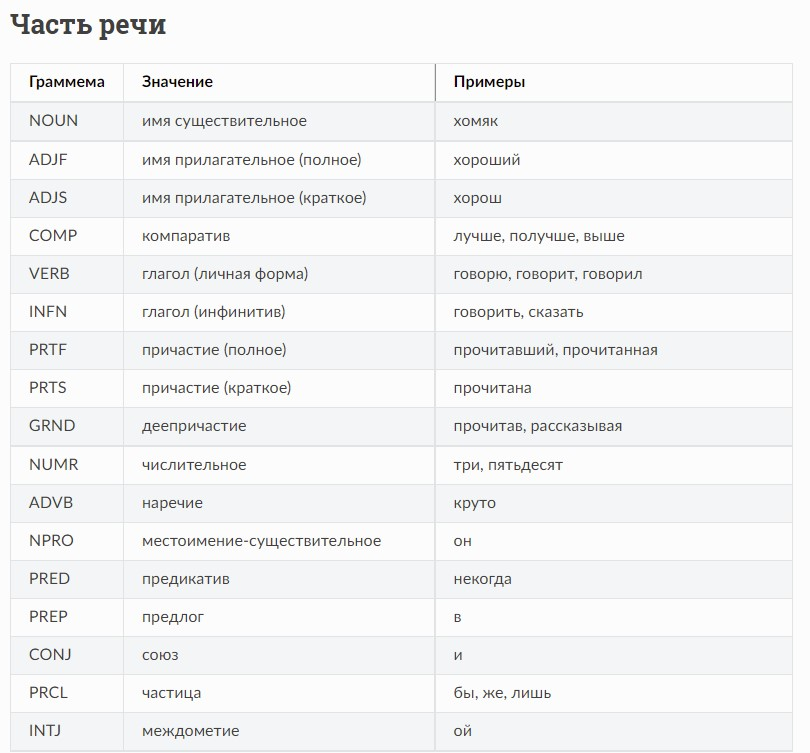

In [36]:
morph = pymorphy2.MorphAnalyzer(lang='ru')
POS_NOUNS = ['NOUN'] # существительные
POS_ADJVS = ['ADJF','ADJS','COMP', 'ADVB']  # прилагательные
POS_VERBS = ['VERB','PRTF','PRTS','INFN','GRND'] # глаголы, причастия, деепричастия
POS_SKIP  = ['PREP','CONJ','PRCL','INTJ','NPRO', 'NUMR','PRED'] # предлоги, сююзы, местоимения, числит.
# пример - морфологический разбора слова "идём" 
print(morph.parse('идём'))

[Parse(word='идём', tag=OpencorporaTag('VERB,impf,intr plur,1per,pres,indc'), normal_form='идти', score=0.5, methods_stack=((DictionaryAnalyzer(), 'идём', 1696, 2),)), Parse(word='идём', tag=OpencorporaTag('VERB,impf,intr sing,impr,incl'), normal_form='идти', score=0.5, methods_stack=((DictionaryAnalyzer(), 'идём', 1696, 11),))]


In [4]:
# Функция для разбиений на токены

separators = ";", ",", '"', ':', '.','!', '?', ' ', '`', '%','$','*','(',')'
regex_punctuation = '|'.join(map(re.escape, separators))

def tokenize(sentence):
  result = [word.lower() for word in re.split(regex_punctuation,sentence) 
              if not word.isnumeric() and word != '']
  return result

# пример
print(tokenize('СМИ: Apple споснирует Гран-при 15 Московского кинофестиваля "Минотавр" в Москве.'))

['сми', 'apple', 'споснирует', 'гран-при', 'московского', 'кинофестиваля', 'минотавр', 'в', 'москве']


In [5]:
# функция для извлечения даты новости из строки со ссылкой на новость
def get_date(link):
  pattern = r'\/20[0-2][0-9][0-1][0-9][0-3][0-9]\/'
  result = re.search(pattern, link)

  if result:
    return result[0][1:-1]
  else:
    return ''
  return 

# пример
get_date('https://ria.ru/20041229/774359.html	Жерар Депардье открыл в Париже второй ресторан')

'20041229'

## Read and count

In [37]:
%%time
url = 'https://raw.githubusercontent.com/ekolonsky/RIA_news/main/'
filenames = ['ria-{:02d}-1.txt'.format(i) for i in range(2,23)] 
filenames += ['ria-{:02d}-2.txt'.format(i) for i in range(2,22)]

words_by_year_cnt, corpus_cnt = Counter(), Counter()
nouns, adjectives, verbs, others = Counter(), Counter(), Counter(), Counter()

# parsed :  key - word in any form, value - parsed word
if parsed not in globals():
  parsed = {} # initialize it if not yet exist

YEAR = '2014'

for filename in filenames:
  print(filename)
  req = requests.get(url + filename)
  for line in req.text.splitlines():
    sep = line.find('\t')
    if sep == -1:
      continue
    link, news = line[:sep],line[sep+1:]
    date = get_date(link)
    year = date[:4]
    words = tokenize(news)
    for word in words:
      # normalize and get POS
      if word not in parsed:
        parsed[word] = morph.parse(word)[0]
      word_morph = parsed[word]
      if str(word_morph.tag) == 'LATN': # латинницу считаем существительными
        pos = 'NOUN'
      else:
        pos = word_morph.tag.POS
      word_normalized = word_morph.normal_form
      # count by POS counters
      if pos in POS_SKIP:
        continue
      elif pos in POS_NOUNS:
        nouns[word_normalized] +=1
      elif pos in POS_ADJVS:
        adjectives[word_normalized] +=1
      elif pos in POS_VERBS:
        verbs[word_normalized] +=1
      else:
        others[word_normalized] +=1
      # count by years
      words_by_year_cnt[(year < YEAR, word_normalized)] +=1
      corpus_cnt[year < YEAR] +=1 


ria-02-1.txt
ria-03-1.txt
ria-04-1.txt
ria-05-1.txt
ria-06-1.txt
ria-07-1.txt
ria-08-1.txt
ria-09-1.txt
ria-10-1.txt
ria-11-1.txt
ria-12-1.txt
ria-13-1.txt
ria-14-1.txt
ria-15-1.txt
ria-16-1.txt
ria-17-1.txt
ria-18-1.txt
ria-19-1.txt
ria-20-1.txt
ria-21-1.txt
ria-22-1.txt
ria-02-2.txt
ria-03-2.txt
ria-04-2.txt
ria-05-2.txt
ria-06-2.txt
ria-07-2.txt
ria-08-2.txt
ria-09-2.txt
ria-10-2.txt
ria-11-2.txt
ria-12-2.txt
ria-13-2.txt
ria-14-2.txt
ria-15-2.txt
ria-16-2.txt
ria-17-2.txt
ria-18-2.txt
ria-19-2.txt
ria-20-2.txt
ria-21-2.txt
CPU times: user 6min 4s, sys: 1.71 s, total: 6min 6s
Wall time: 6min 23s


In [38]:
print('Words before 2014: {:,}'.format(corpus_cnt[True]))
print('Words after 2014:  {:,}'.format(corpus_cnt[False]))
print('Nouns:      {:,}'.format(len(nouns)))
print('Adjectives: {:,}'.format(len(adjectives)))
print('Verbs:      {:,}'.format(len(verbs)))
print('Others:     {:,}'.format(len(others)))



Words before 2014: 10,985,204
Words after 2014:  9,971,115
Nouns:      131,847
Adjectives: 29,212
Verbs:      14,942
Others:     17,157


In [8]:
nouns.most_common(15)

[('россия', 219535),
 ('москва', 140199),
 ('год', 125842),
 ('рф', 122132),
 ('сша', 121815),
 ('человек', 101883),
 ('украина', 85323),
 ('путин', 84904),
 ('глава', 75249),
 ('область', 71647),
 ('дело', 68017),
 ('суд', 58799),
 ('мид', 51621),
 ('президент', 48275),
 ('выборы', 45332)]

In [9]:
verbs.most_common(15)

[('быть', 106572),
 ('заявить', 83908),
 ('мочь', 68782),
 ('погибнуть', 61575),
 ('рассказать', 54951),
 ('стать', 48763),
 ('назвать', 48222),
 ('считать', 43629),
 ('пройти', 42431),
 ('пострадать', 38501),
 ('задержать', 37813),
 ('обсудить', 36933),
 ('получить', 34897),
 ('призвать', 33067),
 ('принять', 32446)]

In [39]:
others.most_common(15)

[('-', 123038),
 ('лнр', 11489),
 ('гд', 10718),
 ('фк', 7222),
 ('—', 6352),
 ('–', 6162),
 ('всу', 5081),
 ('кхл', 4422),
 ('чр', 4349),
 ('i', 3980),
 ('ii', 3889),
 ('ек', 3512),
 ('хк', 3256),
 ('чс', 3203),
 ('спч', 2900)]

## Save

In [40]:
%%time

import codecs

TOP = 10000

def save_to(filename, pos_counter):
  header = 'word; total; before{0}; after{0}\n'.format(YEAR)
  file =  codecs.open(filename, 'w', 'utf-8')
  file.write(header)
  for pair in pos_counter.most_common(TOP):
    word = pair[0]
    total = pair[1]
    file.write(u"{0};{1};{2};{3}\n".format(word, 
                                           total,
                                           words_by_year_cnt[(True, word)],
                                           words_by_year_cnt[(False, word)]))
  file.close()
  return

save_to('adjectives.txt', adjectives)
save_to('verbs.txt', verbs)
save_to('nouns.txt', nouns)
save_to('others.txt', others)




CPU times: user 277 ms, sys: 4 ms, total: 281 ms
Wall time: 283 ms
